# Statistical study of the subset sum problem
## Metaheuristic Problem Solving | MUIIA

### Imports
---

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### READ & PREPROCESS DATAFRAME
---

In [18]:
pathFiles = "./../results/case1/"

strs = [f'{pathFiles}executions/result{x+1}.csv' for x in range(30)]

In [19]:
""" READ & PREPROCESS DATAFRAME """
# reading csv file
df = pd.read_csv(f'{pathFiles}result.csv')

# merging two csv files
dff = pd.concat(map(pd.read_csv, strs), ignore_index=True)



In [20]:
def minmax_norm(df, column):
    return (df[column] - df[column].min()) / ( df[column].max() - df[column].min())

# normalice df
df["bestf"] = minmax_norm(df,"bestf")
df["worstf"] = minmax_norm(df,"worstf")
df["avgf"] = minmax_norm(df,"avgf")

# normalice dff
dff["bestf"] = minmax_norm(dff,"bestf")
dff["worstf"] = minmax_norm(dff,"worstf")
dff["avgf"] = minmax_norm(dff,"avgf")

In [21]:
# Get index of best fitness executions
optimalIndx = df["bestf"] == 1

# Get optimal and not optimal dataset of mean dataset
optimalRes = df[optimalIndx]
notOptimalRes = df[~optimalIndx]

# Get optimal and not optimal dataset of full dataset
optimalResFull = dff[dff["exec"].isin(optimalRes["exec"])]
notOptimalResFull = dff[dff["exec"].isin(notOptimalRes["exec"])]

### PLOTS
---

#### LINE PLOTS

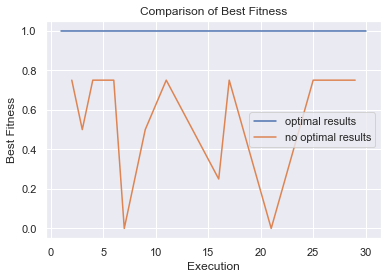

In [22]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="exec", y="bestf",data=optimalRes, label="optimal results")
sns.lineplot(x="exec", y="bestf",data=notOptimalRes, label="no optimal results")

# Add titles to the plot
plt.title("Comparison of Best Fitness")
plt.xlabel("Execution")
plt.ylabel("Best Fitness")
plt.legend()

# Show plot
plt.show()

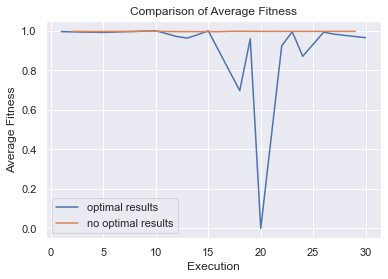

In [23]:

sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="exec", y="avgf",data=optimalRes, label="optimal results")
sns.lineplot(x="exec", y="avgf",data=notOptimalRes, label="no optimal results")

# Add titles to the plot
plt.title("Comparison of Average Fitness")
plt.xlabel("Execution")
plt.ylabel("Average Fitness")
plt.legend()

# Show plot
plt.show()

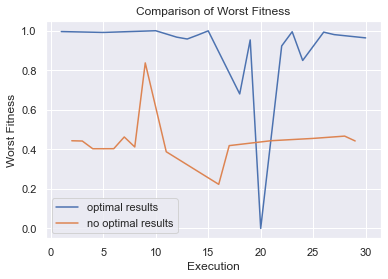

In [24]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="exec", y="worstf",data=optimalRes, label="optimal results")
sns.lineplot(x="exec", y="worstf",data=notOptimalRes, label="no optimal results")

# Add titles to the plot
plt.title("Comparison of Worst Fitness")
plt.xlabel("Execution")
plt.ylabel("Worst Fitness")
plt.legend()

# Show plot
plt.show()

#### HIST PLOTS